In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split


In [34]:
# Load training and test CSV files
train_data = pd.read_csv("fashion-mnist_train.csv")
test_data = pd.read_csv("fashion-mnist_test.csv")

# Separate features and labels
xtrain = train_data.drop("label", axis=1).values
ytrain = train_data["label"].values

xtest = test_data.drop("label", axis=1).values
ytest = test_data["label"].values

#reshaping the input tensor because the mnist input tensor consists of a (28,28,1) grayscale image, but Conv2D requires a 4D tensor.
xtrain = xtrain.reshape(-1,28,28,1)/ 255.0
xtest = xtest.reshape(-1,28,28,1) / 255.0

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(xtrain, ytrain, test_size=0.2, random_state=42)


In [36]:
# Build CNN model
model = Sequential()
model.add(Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))  # 10 classes

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\sumit\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,384,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,386,506 (5.29 MB)

 Trainable params: 1,386,506 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.fit(xtrain, ytrain, epochs=5, validation_split=0.2)


Epoch 1/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.7932 - loss: 0.5737 - val_accuracy: 0.8806 - val_loss: 0.3430
Epoch 2/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.8954 - loss: 0.2892 - val_accuracy: 0.8951 - val_loss: 0.2915
Epoch 3/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.9166 - loss: 0.2290 - val_accuracy: 0.9011 - val_loss: 0.2721
Epoch 4/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.9292 - loss: 0.1870 - val_accuracy: 0.9061 - val_loss: 0.2636
Epoch 5/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.9444 - loss: 0.1554 - val_accuracy: 0.9100 - val_loss: 0.2672


In [38]:
# Evaluate on test data
loss, acc = model.evaluate(xtest, ytest)
print("Test Accuracy:", acc)



375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9098 - loss: 0.2551
Test Accuracy: 0.9075000286102295


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Predicted label: 7


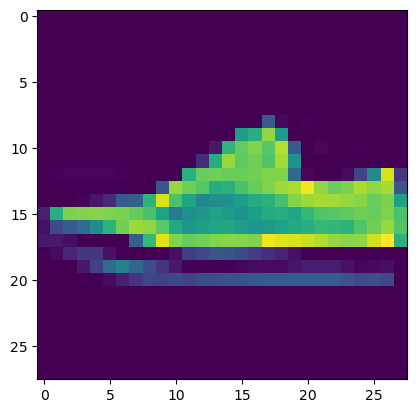

In [39]:
# Predict one sample and show
pred = model.predict(xtest[:1])
print("Predicted label:", np.argmax(pred))
plt.imshow(xtest[0])
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


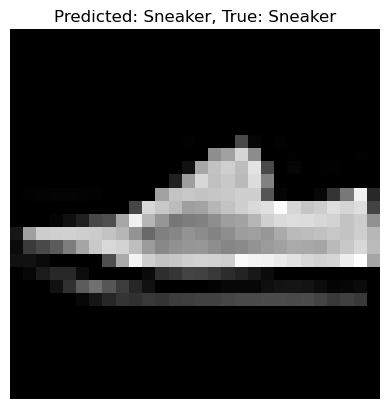

In [40]:
# Class labels
labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Predict on one test image
pred = model.predict(xtest[:1])
predicted_label = labels[np.argmax(pred)]
true_label = labels[ytest[0]]

# Show image and labels
plt.imshow(xtest[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_label}, True: {true_label}")
plt.axis('off')
plt.show()
